# Exercise Chapter 4_ex 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import mistat

# Exercise 1

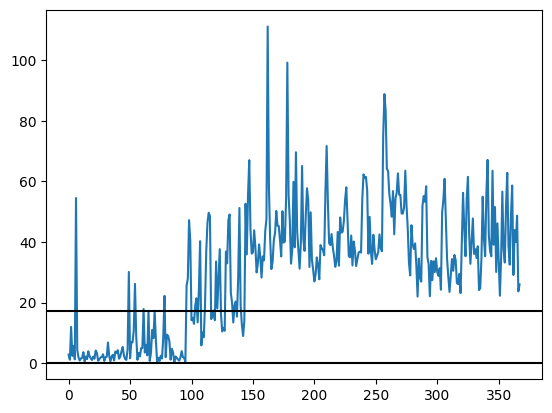

In [3]:
# use eqn 4.1.6 to calculate the upper control limit for monitoring
n = 48; p = 3
UCL = (n-1)*(n+1)*p/(n*(n-p)) * stats.f(p, n-p).ppf(0.997)

tsq = mistat.load_data('TSQ')
ax = tsq.plot()
ax.axhline(UCL, color='black')
ax.axhline(0, color='black')

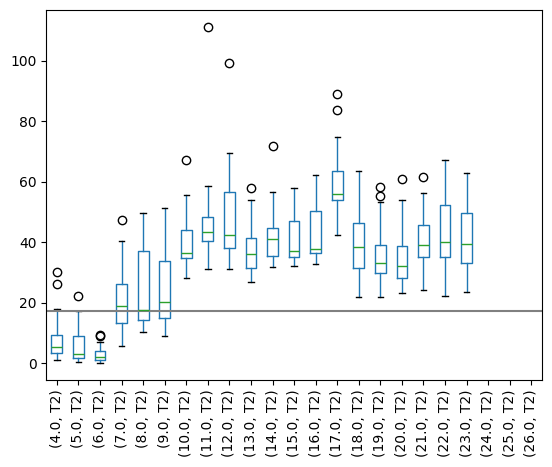

In [4]:
df = pd.DataFrame({
    'T2': tsq,
    'board': mistat.load_data('PLACE')['crcBrd'][48:],
})
ax = df.groupby('board').boxplot(column='T2', subplots=False, rot=90, grid=False)
ax.axhline(UCL, color='grey')
plt.show()

# Exercise 3

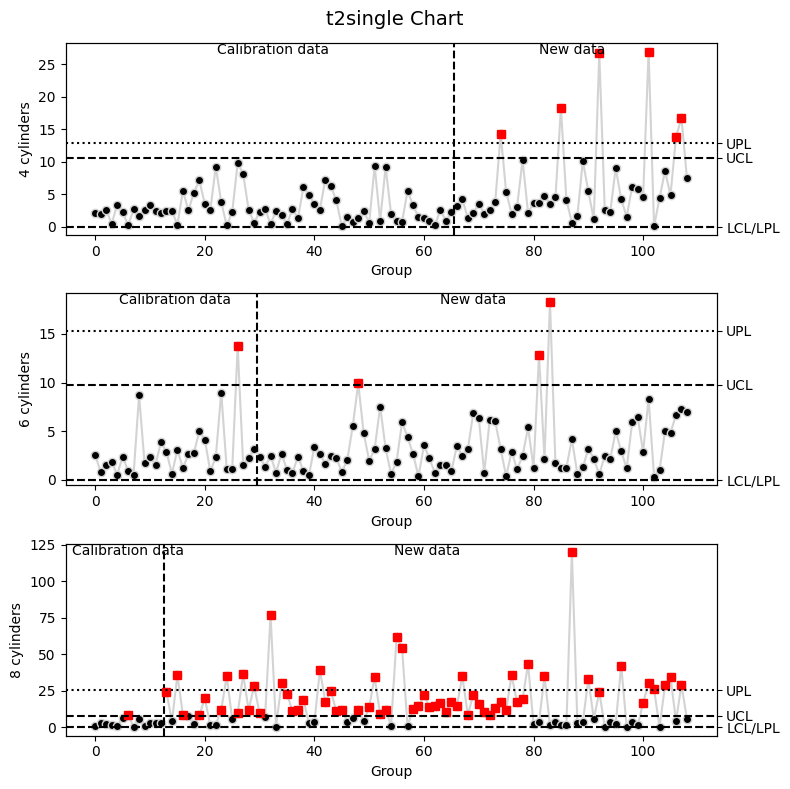

In [5]:
car = mistat.load_data('CAR')
car = car.sort_values('cyl')
columns = ['turn', 'hp', 'mpg']

fig, axes = plt.subplots(nrows=3, figsize=[8, 8])
for cyl, ax in zip([4, 6, 8], axes):
  base = car.loc[car['cyl'] == cyl, columns]
  newdata = car.loc[car['cyl'] != cyl, columns]
  mqcc = mistat.MultivariateQualityControlChart(base, qcc_type='T2single',
             confidence_level=0.99, newdata=newdata)
  mqcc.plot(ax=ax, show_legend=False)
  ax.set_ylabel(f'{cyl} cylinders')
  plt.tight_layout()
plt.show()

# Exercise 4

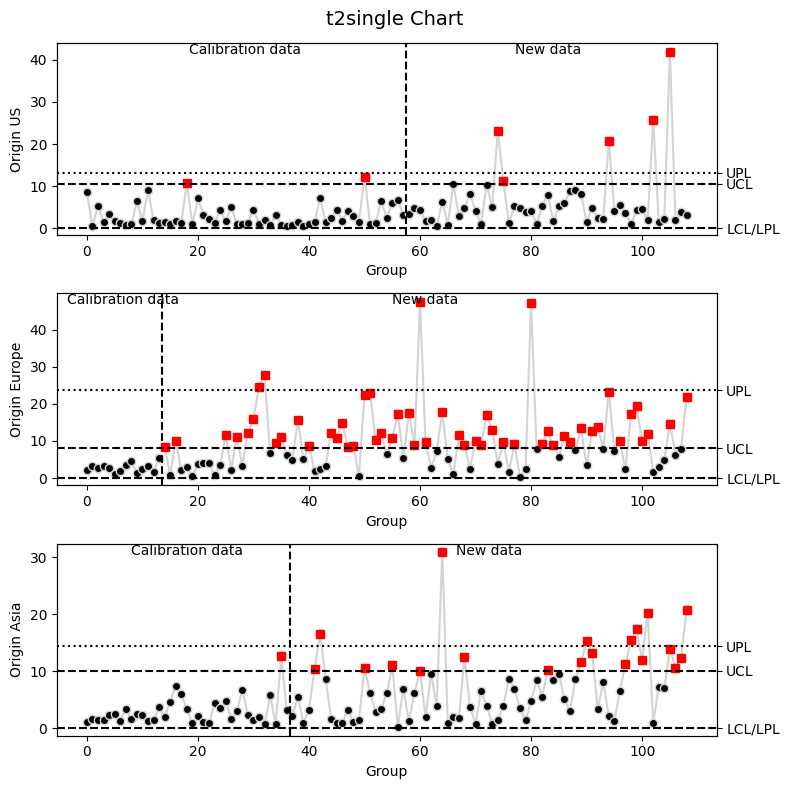

In [6]:
car = mistat.load_data('CAR')
car = car.sort_values('cyl')
columns = ['turn', 'hp', 'mpg']
origins = [None, 'US', 'Europe', 'Asia']

fig, axes = plt.subplots(nrows=3, figsize=[8, 8])
for origin, ax in zip([1, 2, 3], axes):
  base = car.loc[car['origin'] == origin, columns]
  newdata = car.loc[car['origin'] != origin, columns]
  mqcc = mistat.MultivariateQualityControlChart(base, qcc_type='T2single',
             confidence_level=0.99, newdata=newdata)
  mqcc.plot(ax=ax, show_legend=False)
  ax.set_ylabel(f'Origin {origins[origin]}')
plt.tight_layout()
plt.show()

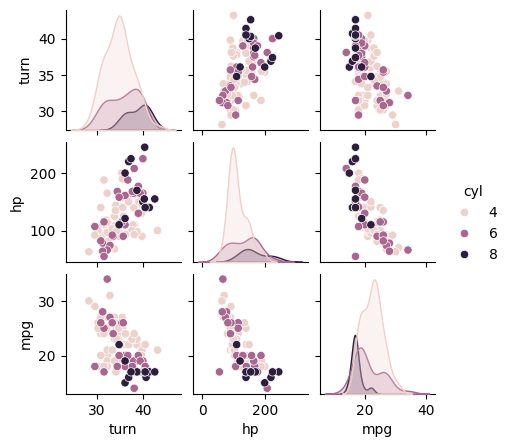

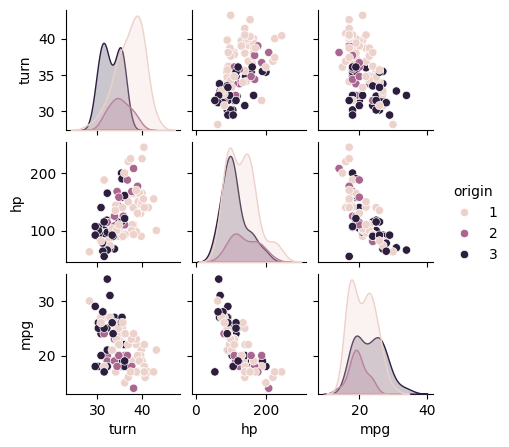

In [7]:
sns.pairplot(car[[*columns, 'cyl']], hue='cyl', height=1.5)
sns.pairplot(car[[*columns, 'origin']], hue='origin', height=1.5)
plt.show()

# Exercise 5

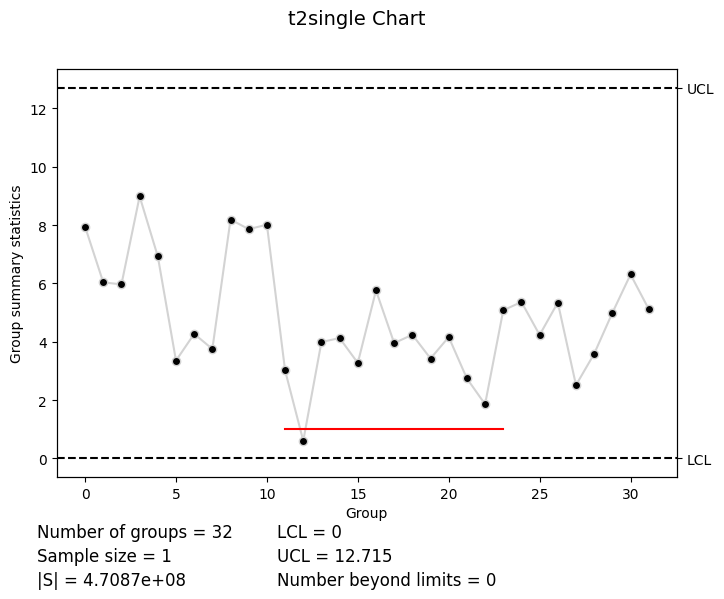

In [8]:
gasol = mistat.load_data('GASOL')
mqcc = mistat.MultivariateQualityControlChart(gasol, qcc_type='T2single',
           confidence_level=0.99)
ax = mqcc.plot()
ax.plot((11, 23), (1, 1), color='red')
plt.show()

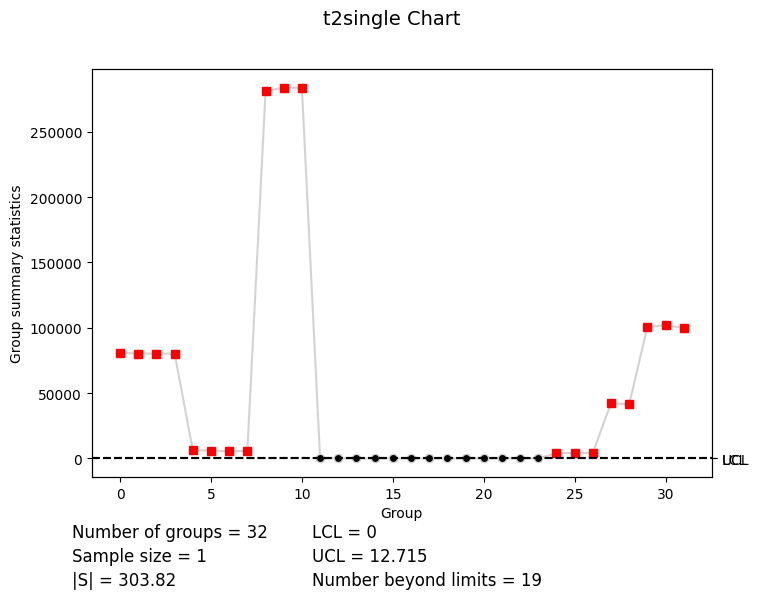

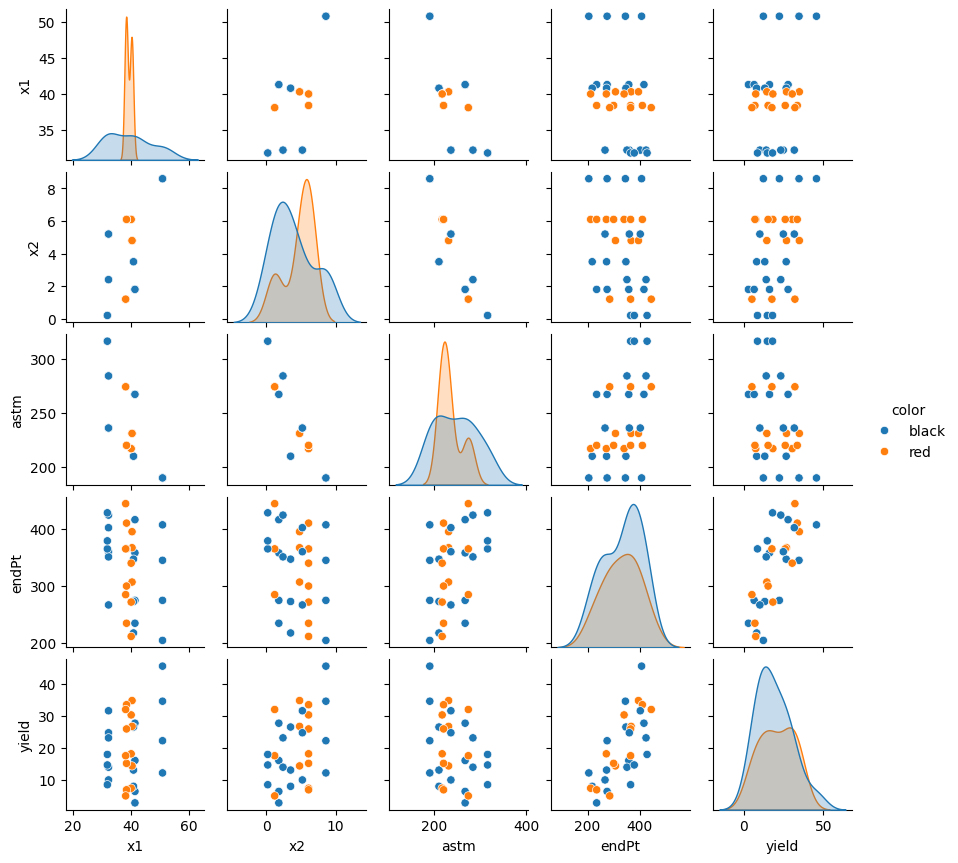

In [9]:
gasol = mistat.load_data('GASOL')
base = gasol.iloc[11:24]
mqcc_base = mistat.MultivariateQualityControlChart(base, qcc_type='T2single',
           confidence_level=0.99)
mqcc = mistat.MultivariateQualityControlChart(gasol, qcc_type='T2single',
          center=mqcc_base.stats.center, cov=mqcc_base.stats.cov,
          confidence_level=0.99)
ax = mqcc.plot()
plt.show()
gasol['color'] = ['red' if 11 <= i < 24 else 'black'
                         for i in range(len(gasol))]
sns.pairplot(gasol, hue='color', height=1.75)
plt.show()

# Exercise 6

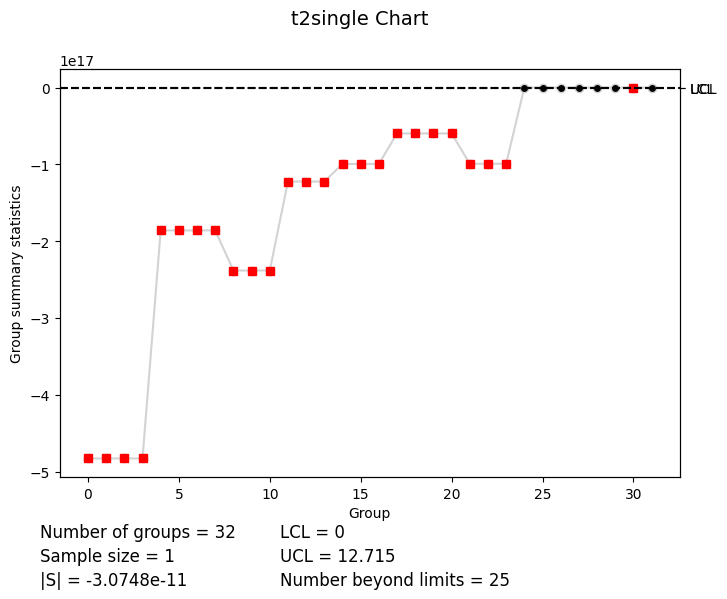

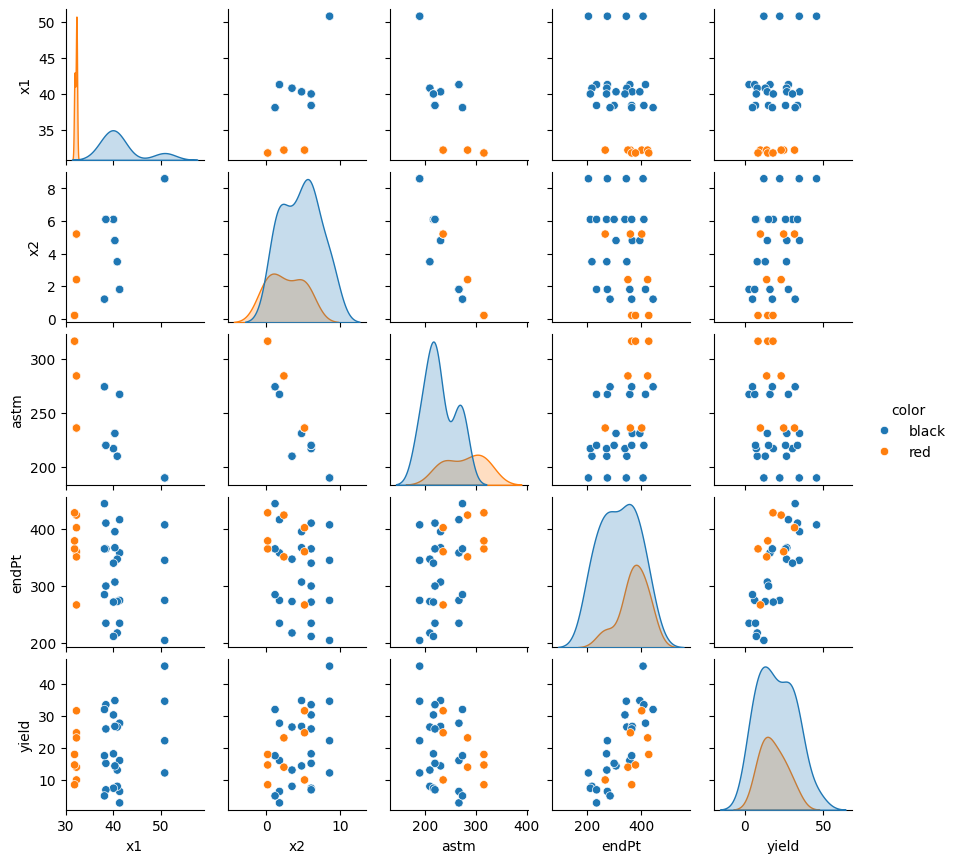

In [10]:
gasol = mistat.load_data('GASOL')
base = gasol.iloc[24:32]
mqcc_base = mistat.MultivariateQualityControlChart(base, qcc_type='T2single',
           confidence_level=0.99)
mqcc = mistat.MultivariateQualityControlChart(gasol, qcc_type='T2single',
          center=mqcc_base.stats.center, cov=mqcc_base.stats.cov,
          confidence_level=0.99)
ax = mqcc.plot()
plt.show()
gasol['color'] = ['red' if 24 <= i < 32 else 'black'
                         for i in range(len(gasol))]
sns.pairplot(gasol, hue='color', height=1.75)
plt.show()